In [2]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

# Import numpy
import numpy as np

# Import pandas for data handling
import pandas as pd

import os

# Import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [3]:
from train_valid_test_loader import load_train_valid_test_datasets

DATA_PATH = 'data_movie_lens_100k/' # TODO fixme: Path to where dataset csv files live on your system (unless in working directory)
assert os.path.exists(os.path.join(DATA_PATH, 'select_movies.csv'))

In [4]:
# Importing the movie dataset
train_tuple, test_tuple, valid_tuple, n_users, n_items = load_train_valid_test_datasets(data_path=DATA_PATH)

# Check size of each split
n_train = len(train_tuple[0])
n_valid = len(valid_tuple[0])
n_test = len(test_tuple[0])

print("n_train", f"{n_train}")
print("n_valid", f"{n_valid}")
print("n_test", f"{n_test}")

n_train 70000
n_valid 10000
n_test 9992


In [14]:
# Create the model
model = CollabFilterOneVectorPerItem(n_epochs=3000, batch_size=10000, step_size=0.7, n_factors=2, alpha=0)

# Initialize the parameters
model.init_parameter_dict(n_users, n_items, train_tuple)
hasattr(model, 'param_dict')

True

In [15]:
model.param_dict

{'mu': array([3.53058571]),
 'b_per_user': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [16]:
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.27720 | tr RMSE     1.12578 | va RMSE     1.12728 | grad_wrt_mu     0.01543 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     1.27371 | tr RMSE     1.12466 | va RMSE     1.12646 | grad_wrt_mu     0.03487 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     1.25064 | tr RMSE     1.12354 | va RMSE     1.12485 | grad_wrt_mu     0.02844 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     1.26877 | tr RMSE     1.12242 | va RMSE     1.12422 | grad_wrt_mu     0.03703 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.571 | loss_total     1.27074 | tr RMSE     1.12148 | va RMSE  

In [17]:
# Here we show at which epochs we collected a snapshot of model performance
model.trace_epoch

[0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857142,
 0.857142857142857,
 1.0,
 1.1428571428571428,
 1.2857142857142856,
 1.4285714285714284,
 1.5714285714285712,
 1.714285714285714,
 1.8571428571428568,
 2.0,
 2.571428571428571,
 3.0,
 3.571428571428571,
 4.0,
 4.571428571428573,
 5.0,
 5.571428571428573,
 6.0,
 6.571428571428573,
 7.0,
 7.571428571428573,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 34.0,
 36.0,
 38.0,
 40.0,
 42.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 64.0,
 66.0,
 68.0,
 70.0,
 72.0,
 74.0,
 76.0,
 78.0,
 80.0,
 82.0,
 84.0,
 86.0,
 88.0,
 90.0,
 92.0,
 94.0,
 96.0,
 98.0,
 100.0,
 102.0,
 104.0,
 106.0,
 108.0,
 110.0,
 112.0,
 114.0,
 116.0,
 118.0,
 120.0,
 122.0,
 124.0,
 126.0,
 128.0,
 132.0,
 136.0,
 140.0,
 144.0,
 148.0,
 152.0,
 156.0,


In [18]:
model.trace_rmse_train

[1.1257795488486895,
 1.1246571186718861,
 1.1235413925039417,
 1.1224169147165322,
 1.1214775153793828,
 1.1203786855624769,
 1.119177383615266,
 1.1181357196548916,
 1.117120944355356,
 1.1159869561887066,
 1.1154213495426846,
 1.114027856875182,
 1.114346356620382,
 1.1124528557758615,
 1.1109452845892214,
 1.1070537362619461,
 1.1049599534569174,
 1.100521098510327,
 1.0981206296212782,
 1.0944060660861965,
 1.0919536199937125,
 1.0889971657344533,
 1.086361520812817,
 1.0833078677923476,
 1.081060760938344,
 1.0784339957337155,
 1.0760583881886154,
 1.071340123656518,
 1.066901213133272,
 1.0626770914513357,
 1.058637985716199,
 1.0548081044228919,
 1.051237156217376,
 1.0477535954429846,
 1.0444349821108991,
 1.0413570229681064,
 1.0384959588580636,
 1.0354721718744815,
 1.0326883045933561,
 1.0300650880557736,
 1.027532490524753,
 1.0252891107879845,
 1.022818458553357,
 1.0206237475980193,
 1.0184300497692302,
 1.0163491589466374,
 1.01480989900468,
 1.0126594859055222,
 1.0107

# Alpha = 0 , K= 2

(0.5, 1.5)

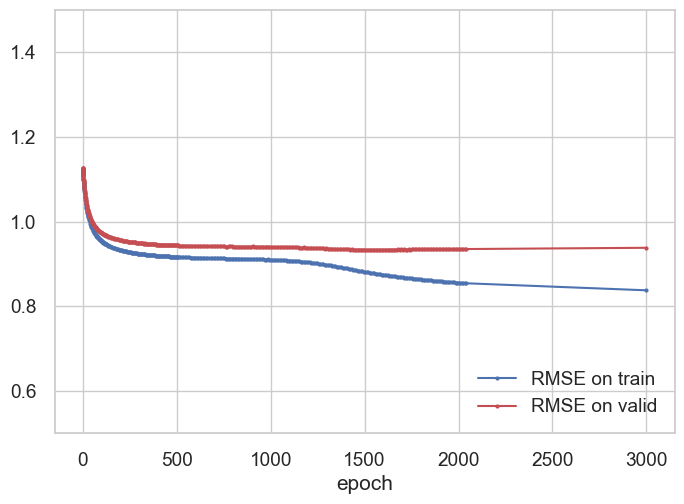

In [ ]:
# Plots to Look at error vs. epoch

plt.plot(model.trace_epoch, model.trace_rmse_train, 'b-', label='RMSE on train')
plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r-', label='RMSE on valid')

plt.xlabel('epoch');
plt.legend(loc='lower right');
plt.ylim([0.5, 1.5])

In [5]:
# Create the model
model = CollabFilterOneVectorPerItem(n_epochs=3000, batch_size=10000, step_size=0.7, n_factors=50, alpha=0)

# Initialize the parameters
model.init_parameter_dict(n_users, n_items, train_tuple)
hasattr(model, 'param_dict')

True

In [6]:
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.25435 | tr RMSE     1.12578 | va RMSE     1.12728 | grad_wrt_mu     0.01676 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     1.23524 | tr RMSE     1.12470 | va RMSE     1.12598 | grad_wrt_mu     0.07067 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     1.29551 | tr RMSE     1.12418 | va RMSE     1.12659 | grad_wrt_mu     0.10543 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     1.26225 | tr RMSE     1.12297 | va RMSE     1.12385 | grad_wrt_mu     0.09055 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.571 | loss_total     1.27369 | tr RMSE     1.12163 | va RMSE  

In [7]:
# Here we show at which epochs we collected a snapshot of model performance
model.trace_epoch

[0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857142,
 0.857142857142857,
 1.0,
 1.1428571428571428,
 1.2857142857142856,
 1.4285714285714284,
 1.5714285714285712,
 1.714285714285714,
 1.8571428571428568,
 2.0,
 2.571428571428571,
 3.0,
 3.571428571428571,
 4.0,
 4.571428571428573,
 5.0,
 5.571428571428573,
 6.0,
 6.571428571428573,
 7.0,
 7.571428571428573,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 34.0,
 36.0,
 38.0,
 40.0,
 42.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 64.0,
 66.0,
 68.0,
 70.0,
 72.0,
 74.0,
 76.0,
 78.0,
 80.0,
 82.0,
 84.0,
 86.0,
 88.0,
 90.0,
 92.0,
 94.0,
 96.0,
 98.0,
 100.0,
 102.0,
 104.0,
 106.0,
 108.0,
 110.0,
 112.0,
 114.0,
 116.0,
 118.0,
 120.0,
 122.0,
 124.0,
 126.0,
 128.0,
 132.0,
 136.0,
 140.0,
 144.0,
 148.0,
 152.0,
 156.0,


In [8]:
model.trace_rmse_train

[1.1257777268944957,
 1.1246951276682156,
 1.124177705232115,
 1.122968576038603,
 1.1216336980602308,
 1.1205244469249984,
 1.1191392090216528,
 1.1181531873745,
 1.1171033455894055,
 1.116326606905689,
 1.114973996472956,
 1.1139075888309298,
 1.113136911095246,
 1.1122138368042063,
 1.1111029162259993,
 1.1071694184436194,
 1.104206676197172,
 1.1005226396300711,
 1.09807434376836,
 1.0944709158250336,
 1.0919347682909875,
 1.088685242752073,
 1.0864998317659094,
 1.0833152236021277,
 1.0810401400411818,
 1.0782901513146605,
 1.0760984003891043,
 1.071649898677583,
 1.0672294416449053,
 1.0626249565052568,
 1.05864991382682,
 1.0548401744089997,
 1.051169549890018,
 1.0477398588029536,
 1.0444657876998638,
 1.0414957038001853,
 1.0382719351020322,
 1.0357652403442448,
 1.0327187701635239,
 1.0302156034741796,
 1.0275252684990082,
 1.0253816786781091,
 1.0227808720024643,
 1.020525070469013,
 1.018382356670848,
 1.0163107115958447,
 1.0143756535756419,
 1.012549488198683,
 1.01071383

(0.0, 1.5)

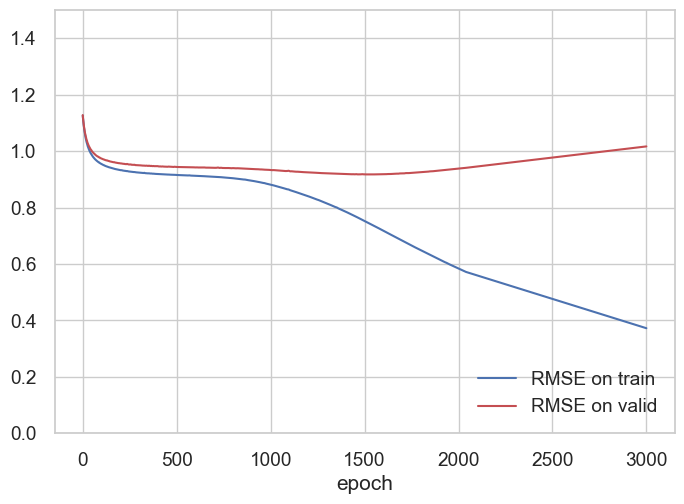

In [10]:
# Plots to Look at error vs. epoch

plt.plot(model.trace_epoch, model.trace_rmse_train, 'b-', label='RMSE on train')
plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r-', label='RMSE on valid')

plt.xlabel('epoch');
plt.legend(loc='lower right');
plt.ylim([0, 1.5])